Importing Libraries

In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


Loading Dataset and Feature Engg

In [177]:
# Load the dataset (replace with your dataset file path)
df = pd.read_csv("brain_stroke.csv")

# Splitting features and target
X = df.drop('stroke', axis=1)  # Replace 'stroke' with your target column
y = df['stroke']

# Define categorical and numerical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_features = ['age', 'hypertension','avg_glucose_level', 'bmi']


In [178]:
# Display unique values in each categorical column
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in gender: ['Male' 'Female']
Unique values in ever_married: ['Yes' 'No']
Unique values in work_type: ['Private' 'Self-employed' 'Govt_job' 'children']
Unique values in Residence_type: ['Urban' 'Rural']
Unique values in smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Data Visualization

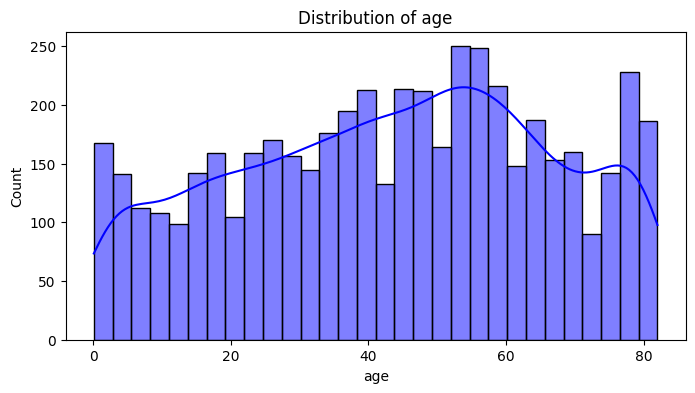

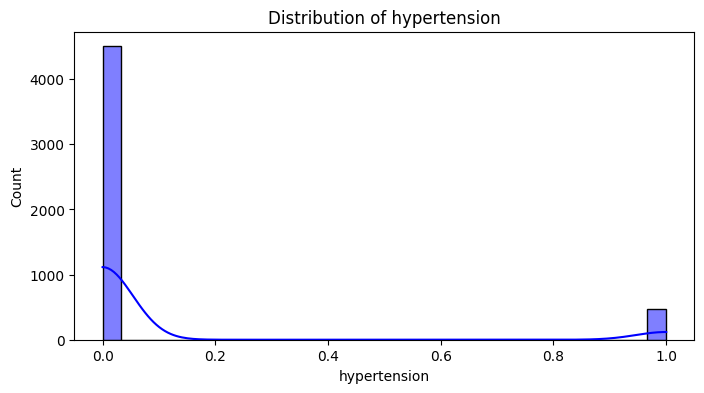

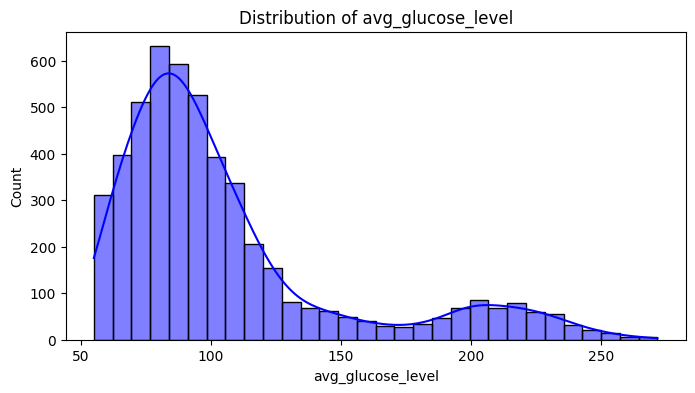

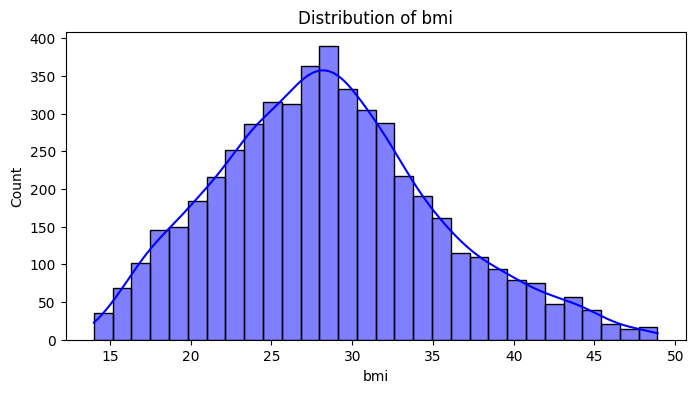

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


C:\Users\kaust\AppData\Local\Temp\ipykernel_18060\800565010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')


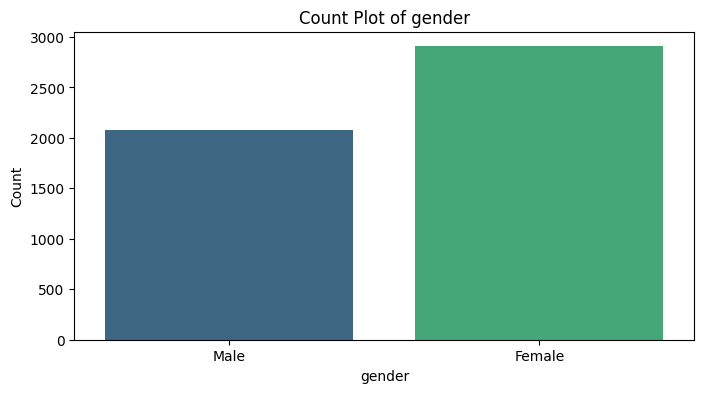

C:\Users\kaust\AppData\Local\Temp\ipykernel_18060\800565010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')


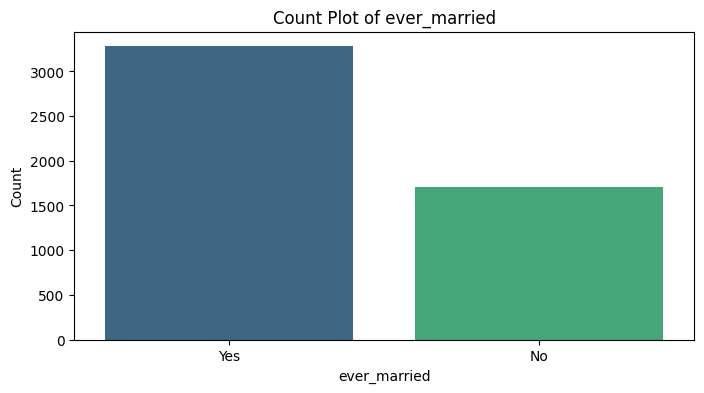

C:\Users\kaust\AppData\Local\Temp\ipykernel_18060\800565010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')


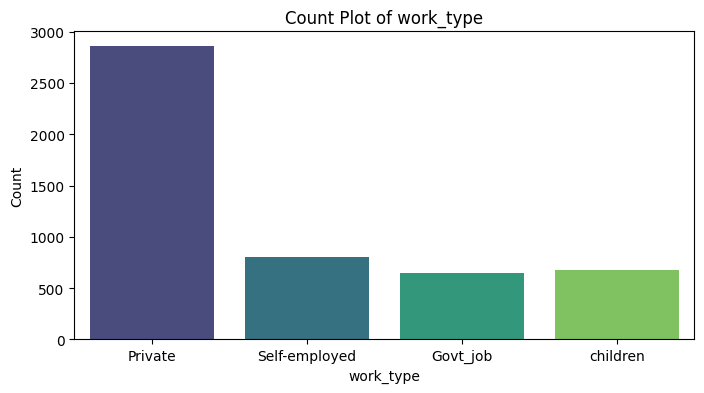

C:\Users\kaust\AppData\Local\Temp\ipykernel_18060\800565010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')


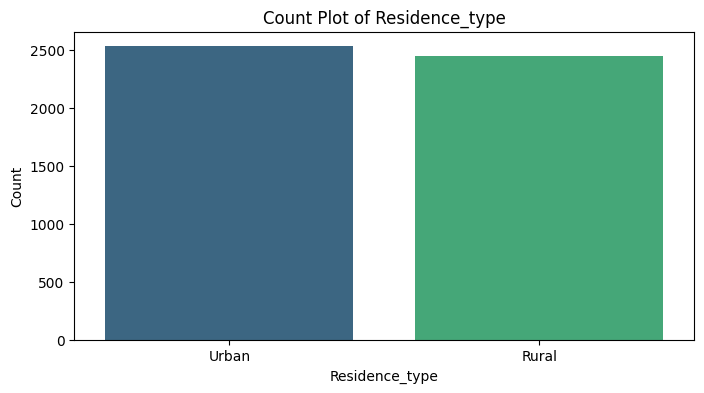

C:\Users\kaust\AppData\Local\Temp\ipykernel_18060\800565010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')


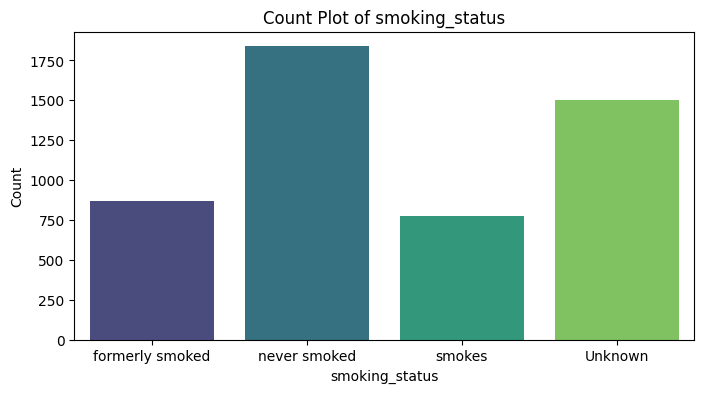

In [180]:
# Count plots for categorical variables
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[feature], palette='viridis')
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


More Feature Engg.

In [181]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming `X` is your input data (a pandas DataFrame)
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_features = ['age', 'heart_disease','hypertension', 'avg_glucose_level', 'bmi']

# Encode categorical features with LabelEncoder (integer encoding)
encoder = LabelEncoder()

for feature in categorical_features:
    X[feature] = encoder.fit_transform(X[feature])

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Now, `X` is processed with numerical columns ready for model training


Train-Test Split

In [182]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [183]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4260,0,0.555158,-0.326186,-0.241735,1,2,1,-0.173140,0.618846,1
1658,1,-0.371566,-0.326186,-0.241735,1,1,1,-0.513271,-0.677220,2
1151,1,-1.254160,-0.326186,-0.241735,0,1,0,-0.606901,-0.500483,0
3975,1,0.511028,-0.326186,-0.241735,1,1,0,-0.567852,0.029725,3
647,0,-1.342419,-0.326186,-0.241735,0,3,0,-0.947033,-1.325252,0


In [184]:
X_train.shape

(3486, 10)

Model 1: Decision Tree

In [185]:
# Model Training and Evaluation
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
predictions_dt = decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, predictions_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Classification Report:\n{classification_report(y_test, predictions_dt)}")


Decision Tree Accuracy: 0.9043
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1417
           1       0.16      0.19      0.17        78

    accuracy                           0.90      1495
   macro avg       0.56      0.57      0.56      1495
weighted avg       0.91      0.90      0.91      1495



Model 2: Logistic Regression

In [186]:
# Logistic Regression
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)
predictions_lr = logistic_regression_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, predictions_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Classification Report:\n{classification_report(y_test, predictions_lr)}")



Logistic Regression Accuracy: 0.9478
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



c:\Users\kaust\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kaust\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kaust\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model 3: KNN

In [187]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
predictions_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")
print(f"K-Nearest Neighbors Classification Report:\n{classification_report(y_test, predictions_knn)}")


K-Nearest Neighbors Accuracy: 0.9452
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.30      0.04      0.07        78

    accuracy                           0.95      1495
   macro avg       0.62      0.52      0.52      1495
weighted avg       0.92      0.95      0.92      1495



Model 4: Random Forest

In [188]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
predictions_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, predictions_rf)}")

Random Forest Accuracy: 0.9458
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



Model 5: SVM

In [189]:
# Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train, y_train)
predictions_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Classification Report:\n{classification_report(y_test, predictions_svm)}")

SVM Accuracy: 0.9478
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



c:\Users\kaust\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kaust\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kaust\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Comparative Analysis

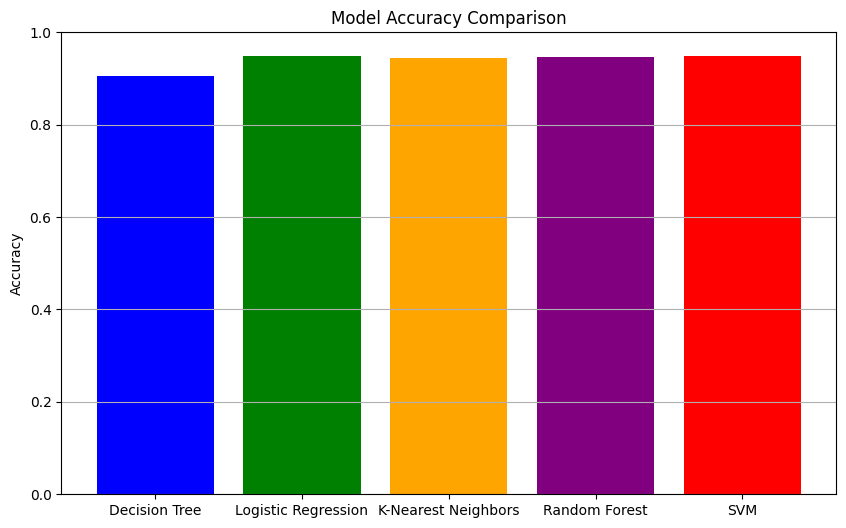

In [190]:
# Comparative Analysis
model_accuracies = {
    "Decision Tree": accuracy_dt,
    "Logistic Regression": accuracy_lr,
    "K-Nearest Neighbors": accuracy_knn,
    "Random Forest": accuracy_rf,
    "SVM": accuracy_svm
}

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()



In [191]:
# Print summary
print("\nModel Performance Summary:")
for model_name, acc in model_accuracies.items():
    print(f"{model_name}: {acc:.4f}")


Model Performance Summary:
Decision Tree: 0.9043
Logistic Regression: 0.9478
K-Nearest Neighbors: 0.9452
Random Forest: 0.9458
SVM: 0.9478


Pickling

In [192]:
import pickle

# Save the Random Forest model to a file
with open('stroke_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

# Load the Random Forest model from the file
with open('stroke_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

# Verify the loaded model by making predictions
loaded_predictions = loaded_rf_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_predictions)
print(f"Loaded Random Forest Model Accuracy: {loaded_accuracy:.4f}")


Loaded Random Forest Model Accuracy: 0.9458
